# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
pd.__version__

'1.0.1'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [ ]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [ ]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [ ]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


In [ ]:
#pd.reset_option('display.max_rows')
test_df = cast.loc[(cast.title=='Steve Jobs') & (cast.year==2015) & (cast.n<2) & (cast.character=='Steve Jobs')]
#pd.set_option('display.max_rows', 5000)
test_df
#

,title,year,name,type,character,n
705243,Steve Jobs,2015,Michael Fassbender,actor,Steve Jobs,1.0


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [ ]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [ ]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [ ]:
len(movies)

244914

### List all Batman movies ever made

In [ ]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [ ]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [ ]:
batman_df.sort_values(by = ['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [ ]:
# create a dataframe with harry potter in title
harry_porter_movies_df = movies[movies.title.str.contains('Harry Potter',case=False)]
# sort by years in descending order
sorted_harry_porter_movies_df = harry_porter_movies_df.sort_values(by=['year'],ascending=False)
sorted_harry_porter_movies_df

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [ ]:
print('Number of movies in 2017:',len(movies[movies.year == 2017]))

Number of movies in 2017: 11474


### Section I - Q2 : How many movies were made in the year 2015?

In [ ]:
print('Numer of movies in 2015:',len(movies[movies['year']==2015]))

Numer of movies in 2015: 8702


### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [ ]:
print('Number of movies between 2000 and 2018:',len(movies[(movies.year>= 2000) & (movies.year<=2018)]))

Number of movies between 2000 and 2018: 114070


### Section I - Q4: How many movies are titled "Hamlet"?

In [ ]:

print ('Number of movies titled Hamlet:', len(movies[movies.title == 'Hamlet']))


Number of movies titled Hamlet: 20


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [ ]:
# create dataframe based on needed filters
hamlet_movies_df = movies[(movies.title == 'Hamlet') & (movies.year >= 2000) ]
# sort by year
print(hamlet_movies_df.sort_values(by='year'))

         title  year
55639   Hamlet  2000
1931    Hamlet  2009
227953  Hamlet  2011
178290  Hamlet  2014
186137  Hamlet  2015
191940  Hamlet  2016
244747  Hamlet  2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [ ]:
# supporting case have null n value, use isnull to select them
inception_supporting_cast_df = cast[(cast.title == 'Inception') & (cast.n.isnull())]
print ('Number of supporting cast roles:', len(inception_supporting_cast_df))

Number of supporting cast roles: 27


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [ ]:
# use notnull on 'n' to select main cast
inception_main_cast_df = cast[(cast.title == 'Inception') & (cast.n.notnull())]
inception_main_cast_df
print ('Number of main cast roles:', len(inception_main_cast_df))

Number of main cast roles: 51


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [ ]:
# sort by n value
top_ten_inception_cast = inception_main_cast_df.sort_values(by='n', ascending = True)[:10]
top_ten_inception_cast

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [ ]:
dumbledore_df = cast[cast.character == 'Albus Dumbledore']
print('A) Movies with character Albus Dumbledore :')
print (dumbledore_df.title)
print('\n')


A) Movies with character Albus Dumbledore :
704984                                    Epic Movie
792421           Harry Potter and the Goblet of Fire
792423     Harry Potter and the Order of the Phoenix
792424      Harry Potter and the Prisoner of Azkaban
947789       Harry Potter and the Chamber of Secrets
947790         Harry Potter and the Sorcerer's Stone
1685537                        Ultimate Hero Project
2248085                                       Potter
Name: title, dtype: object




In [ ]:
# select only name of the actor
dumbledore_actors = dumbledore_df.name
# select distinct name
dumbledore_actors_unique = dumbledore_actors.drop_duplicates()
print ('B) Actors who played Albus Dumbledore:')
print(dumbledore_actors_unique)


B) Actors who played Albus Dumbledore:
704984            Dane Farwell
792421          Michael Gambon
947789          Richard Harris
1685537    George (X) O'Connor
2248085      Timothy Tedmanson
Name: name, dtype: object


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [ ]:
keanu_df = cast[cast.name == 'Keanu Reeves']
# select only distinct roles
keanu_df_roles = keanu_df.character.drop_duplicates()
print ('A) Number of roles played by Keanu Reeves',len(keanu_df_roles))
 

A) Number of roles played by Keanu Reeves 56


In [ ]:
# find only main cast using n value =1
keanu_leading_df = keanu_df[(keanu_df.n==1) & (keanu_df.year >= 1999)]
# sort by year
keanu_leading_df_sorted = keanu_leading_df.sort_values(by='year')
# select distinct roles
keanu_df_leading_unique_roles_sorted = keanu_leading_df_sorted['character'].drop_duplicates()
print (' B) leading roles that Keanu Reeves played on or after 1999 in order by year\n',keanu_df_leading_unique_roles_sorted)

 B) leading roles that Keanu Reeves played on or after 1999 in order by year
 1892390                     Neo
1892397             Shane Falco
1892358           Conor O'Neill
1892383             Nelson Moss
1892348        John Constantine
1892388              Alex Wyler
1892382    Detective Tom Ludlow
1892385                  Klaatu
1892359             Henry Torne
1892342                     Kai
1892361               John Wick
1892366                    Evan
1892399                  Ramsey
1892378              Lucas Hill
Name: character, dtype: object


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [ ]:
roles_1950_1960 = cast[ (cast.year >= 1950)  & (cast.year <= 1960) & ((cast.type == 'actor') |
 (cast.type == 'actress')) ]
roles_1950_1960
print ('A) number of actor and actress roles available from 1950 - 1960:', len(roles_1950_1960))

A) number of actor and actress roles available from 1950 - 1960: 234635


In [ ]:

roles_2007_2017 = cast[ (cast.year >= 2007)  & (cast.year <= 2017) & ((cast.type == 'actor') |
 (cast.type == 'actress')) ]
print ('B) number of actor and actress roles available from 2007 - 2017:', len(roles_2007_2017))


B) number of actor and actress roles available from 2007 - 2017: 1452413


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [ ]:
leading_roles = cast[ (cast.year >= 2000)  & (cast.n == 1) ]
print ('A) number of leading roles available from 2000 to present:',len(leading_roles))

A) number of leading roles available from 2000 to present: 60568


In [ ]:
non_leading_roles = cast[ (cast.year >= 2000)  & (cast.n != 1)  & (cast.n.notnull())]
print ('B) number of non-leading roles available from 2000 to present:',len(non_leading_roles))

B) number of non-leading roles available from 2000 to present: 1001710


In [ ]:
support_roles = cast[ (cast.year >= 2000)  & (cast.n.isnull())]
print ('C) number of support roles available from 2000 to present:',len(support_roles))

C) number of support roles available from 2000 to present: 887484


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [ ]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Temptation              12
The Outsider            12
Maya                    12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

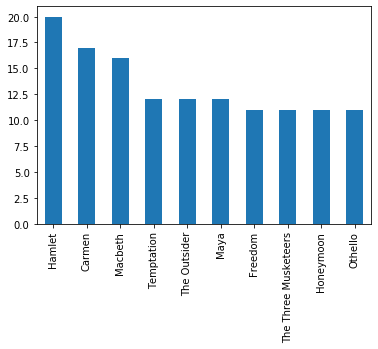

In [ ]:
top_ten.plot(kind='bar')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [ ]:
movies_2000 = movies[movies.year >= 2000]
# group by year and find sum
grouped_movies_2000 = movies_2000.groupby('year').count()
# rename to better column name
grouped_movies_2000 = grouped_movies_2000.rename(columns={"title":"movie_count"})
# sort values based on count and find top 3
top_movies_2000 = grouped_movies_2000.sort_values(by='movie_count', ascending = False)
top_movies_2000[:3]

,movie_count
year,
2017,11474
2016,9440
2015,8702


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

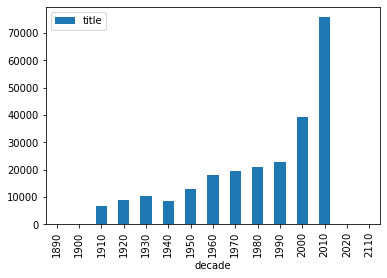

In [ ]:
movies_with_decade = movies
# add a new column decade to dataframe
movies_with_decade['decade'] = movies_with_decade.year - movies_with_decade.year %10
# group by new decade column
grouped_movies_decade = movies_with_decade.groupby('decade').count()
grouped_movies_decade.plot(kind='bar',y='title')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [ ]:
print ('(A) top 10 most common character names in movie history')
cast.character.value_counts()[:10]


(A) top 10 most common character names in movie history


Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [ ]:
print ('B) top 10 people most often credited as "Herself" in movie history?')
herself_df= cast[cast.character == 'Herself']
herself_df.name.value_counts()[:10]

B) top 10 people most often credited as "Herself" in movie history?


Queen Elizabeth II        12
Joyce Brothers             9
Luisa Horga                9
Mar?a Luisa (V) Mart?n     9
Margaret Thatcher          8
Hillary Clinton            8
Rekha                      6
Joan Rivers                6
Oprah Winfrey              6
Sumie Sakai                6
Name: name, dtype: int64

In [ ]:
print ('C) top 10 people most often credited as "Himself" in movie history?')
herself_df= cast[cast.character == 'Himself']
herself_df.name.value_counts()[:10]

C) top 10 people most often credited as "Himself" in movie history?


Adolf Hitler          99
Richard Nixon         44
Ronald Reagan         41
John F. Kennedy       37
George W. Bush        25
Winston Churchill     24
Martin Luther King    23
Ron Jeremy            22
Bill Clinton          22
Benito Mussolini      21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [ ]:
print (' A) top 10 most frequent roles that start with the word Zombie')
zombie_df = cast[cast.character.str.startswith('Zombie')]
print (zombie_df.character.value_counts()[:10])

 A) top 10 most frequent roles that start with the word Zombie
Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie #1                        36
Zombie Girl                      36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64


In [ ]:
print (' A) top 10 most frequent roles that start with the word Police')
police_df = cast[cast.character.str.startswith('Police')]
print (police_df.character.value_counts()[:10])

 A) top 10 most frequent roles that start with the word Police
Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64


### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

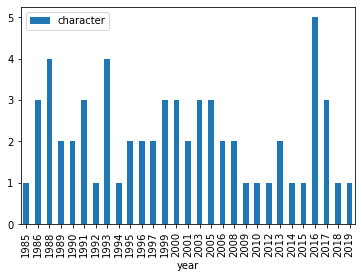

In [ ]:
keanu_df = cast[cast.name == 'Keanu Reeves']
#group by year
grouped_keanu_df = keanu_df.groupby('year').count()
grouped_keanu_df.plot(kind='bar',y='character')


### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


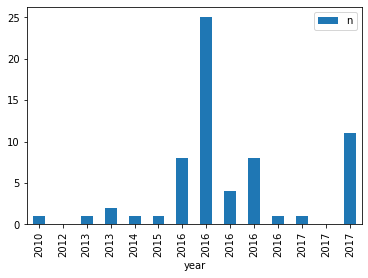

In [ ]:
#filter to reduce number of datapoints to plot
keanu_df_role = cast[(cast.name == 'Keanu Reeves' ) & (cast.year >= 2010) & (cast.year < 2018)].fillna(0)
#in one year he can play multiple roles with different cast positions
keanu_df_role = keanu_df_role[['year','n']]
keanu_df_role
keanu_df_role.sort_values(by='year').plot(kind='bar',x='year', y='n')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

/opt/conda/envs/springboard/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


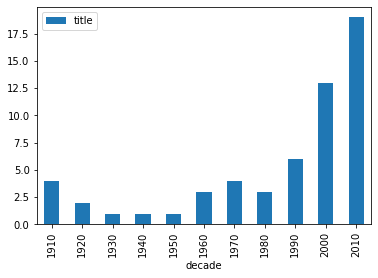

In [ ]:
hamlet_df = movies[movies.title.str.contains('Hamlet', case=False)]
hamlet_df_with_decade = hamlet_df
# add a new column decade to dataframe
hamlet_df_with_decade['decade'] = hamlet_df.year - hamlet_df.year %10
grouped_hamlet_movies_decade = hamlet_df_with_decade.groupby('decade').count()
grouped_hamlet_movies_decade.plot(kind='bar',y='title')


### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [ ]:
leading_roles_both = cast[ (cast.year >= 1960)  & (cast.year <= 1969) & ((cast.type == 'actor') | 
(cast.type == 'actress')) & (cast.n == 1) ]
print('A) leading roles were available to both actors and actresses, in the 1960s:',len(leading_roles_both))

A) leading roles were available to both actors and actresses, in the 1960s: 11823


In [ ]:
leading_roles_both_2000 = cast[ (cast.year >= 2000)  & (cast.year <= 2009) & ((cast.type == 'actor') | 
(cast.type == 'actress')) & (cast.n == 1) ]
print('B) leading roles were available to both actors and actresses, in the 2000s:',len(leading_roles_both_2000))

B) leading roles were available to both actors and actresses, in the 2000s: 26344


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [ ]:
frank_oz_df = cast[cast.name == 'Frank Oz']
# group by year and title
grouped_frank_oz_df = frank_oz_df.groupby(['year','title'])
# filter data if each group has more than 1 row
# len > 1 would mean there are more than 1 row for the year,title combination
multiple_role_df = grouped_frank_oz_df.filter(lambda i: len(i) >1 )
multiple_role_df = multiple_role_df[['year', 'title']].drop_duplicates()
multiple_role_df.sort_values(by='year')

,year,title
1723645,1979,The Muppet Movie
1723598,1981,An American Werewolf in London
1723632,1981,The Great Muppet Caper
1723629,1982,The Dark Crystal
1723653,1984,The Muppets Take Manhattan
1723601,1985,Follow That Bird
1723638,1992,The Muppet Christmas Carol
1723608,1996,Muppet Treasure Island
1723612,1999,Muppets from Space
1723625,1999,The Adventures of Elmo in Grouchland


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [ ]:
frank_oz_role_df = cast[cast.name == 'Frank Oz']
frank_oz_role_df
# group by character
grouped_frank_oz_role_df = frank_oz_role_df.groupby(['character'])
# filter based on number of rows in each character
# if there are more than oe row, it would mean they played the character more than once
more_than_twice_role_df = grouped_frank_oz_role_df.filter(lambda i: len(i) >1 )
more_than_twice_role_df
more_than_twice_role_df = more_than_twice_role_df['character'].drop_duplicates()
more_than_twice_role_df


1723599        Miss Piggy
1723601    Cookie Monster
1723602              Bert
1723603            Grover
1723609       Fozzie Bear
1723610     Sam the Eagle
1723611            Animal
1723618              Yoda
Name: character, dtype: object

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

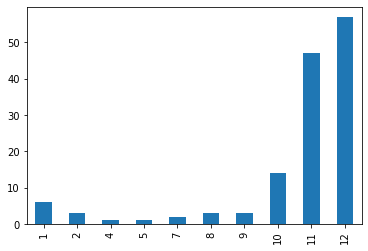

In [ ]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

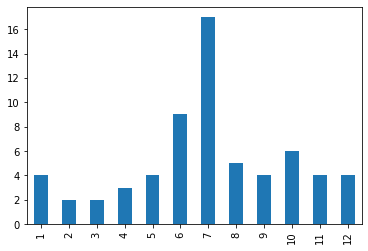

In [ ]:
summer_movies = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer_movies.date.dt.month.value_counts().sort_index().plot(kind='bar')


### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

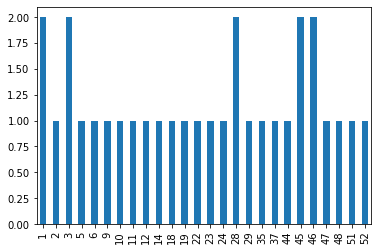

In [ ]:
action_movies = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action_movies.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [ ]:
# filter to find only lead roles
keanu_reves_lead_role = cast[(cast.name == 'Keanu Reeves') & (cast.n == 1)]
# filter only usa releases
usa_release_dates = release_dates [release_dates.country == 'USA']
# merge two dataframes based on columns title and year
keanu_reves_lead_role_release_date = keanu_reves_lead_role.merge(usa_release_dates, on=['title','year'], how='inner')
keanu_reves_lead_role_release_date[['year','date','title']].sort_values(by='date')



,year,date,title
20,1988,1988-04-15,The Night Before
3,1989,1989-02-17,Bill & Ted's Excellent Adventure
2,1991,1991-07-19,Bill & Ted's Bogus Journey
12,1993,1994-05-25,Little Buddha
13,1994,1994-06-10,Speed
10,1995,1995-05-26,Johnny Mnemonic
1,1995,1995-08-11,A Walk in the Clouds
4,1996,1996-08-02,Chain Reaction
6,1996,1996-09-13,Feeling Minnesota
17,1997,1997-10-17,The Devil's Advocate


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

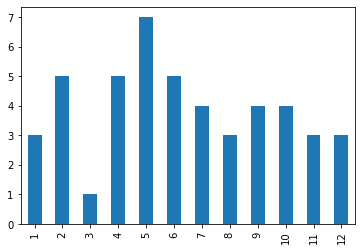

In [ ]:

keanu_reves_role = cast[(cast.name == 'Keanu Reeves')]
# filter only usa releases
usa_release_dates = release_dates [release_dates.country == 'USA']
# merge two dataframes based on columns title and year
keanu_reves_role_release_date = keanu_reves_role.merge(usa_release_dates, on=['title','year'], how='inner')
keanu_reves_role_release_date.date.dt.month.value_counts().sort_index().plot(kind='bar')


### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

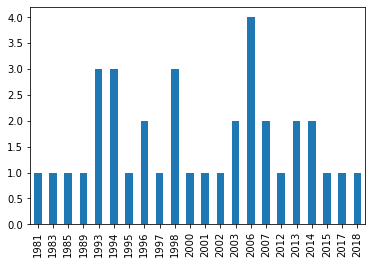

In [ ]:

ian_mc_movies = cast[cast.name == 'Ian McKellen']
# filter only usa releases
usa_release_dates = release_dates[release_dates.country == 'USA']
# join based on title, year
ian_mc_usa_movies = ian_mc_movies.merge(usa_release_dates, on=['title','year'], how='inner')
ian_mc_usa_movies = ian_mc_usa_movies[['year','date','title']].drop_duplicates()
# show count for each year
ian_mc_usa_movies.date.dt.year.value_counts().sort_index().plot(kind='bar')